# TW4

## Decision Trees

### Team members

Notes: This homework can be done individually or by a group (either project group or the group you work in class). If this is done by a group, please write the names of students who work together. 

-Thomas Bakken

-

-

-


### Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [73]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Part 0

- Read each cell of the examples below, run and check the outputs. 

### Confusion matrix plot

In [74]:
# Show confusion matrix
def plot_confusion_matrix(confusion_mat, cln):
    plt.imshow(confusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(cln)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### Confusion matrix simple example 1

[[2 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 2]]


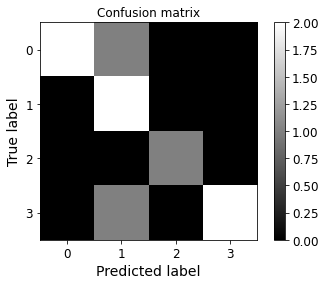

In [75]:
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]

confusion_mat = confusion_matrix(y_true, y_pred)
print(confusion_mat)

plot_confusion_matrix(confusion_mat, 4)

In [76]:
# Print classification report
target_names = ['C0', 'C1', 'C2', 'C3']

result_metrics = classification_report(y_true, y_pred,
                                      target_names = target_names)

print(result_metrics)

              precision    recall  f1-score   support

          C0       1.00      0.67      0.80         3
          C1       0.50      1.00      0.67         2
          C2       1.00      1.00      1.00         1
          C3       1.00      0.67      0.80         3

    accuracy                           0.78         9
   macro avg       0.88      0.83      0.82         9
weighted avg       0.89      0.78      0.79         9



### Confusion matrix simple example 2

[[2 2]
 [0 5]]


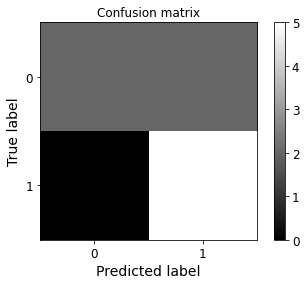

In [77]:
y_true2 = [1, 0, 0, 1, 1, 0, 1, 1, 0]
y_pred2 = [1, 1, 0, 1, 1, 0, 1, 1, 1]

confusion_mat2 = confusion_matrix(y_true2, y_pred2)
print(confusion_mat2)

plot_confusion_matrix(confusion_mat2, 2)

In [78]:
# Print classification report
target_names2 = ['C0', 'C1']

result_metrics = classification_report(y_true2, y_pred2,
                                      target_names = target_names2)

print(result_metrics)

              precision    recall  f1-score   support

          C0       1.00      0.50      0.67         4
          C1       0.71      1.00      0.83         5

    accuracy                           0.78         9
   macro avg       0.86      0.75      0.75         9
weighted avg       0.84      0.78      0.76         9



## Data Visualization

### iris dataset before we start training and testing a model

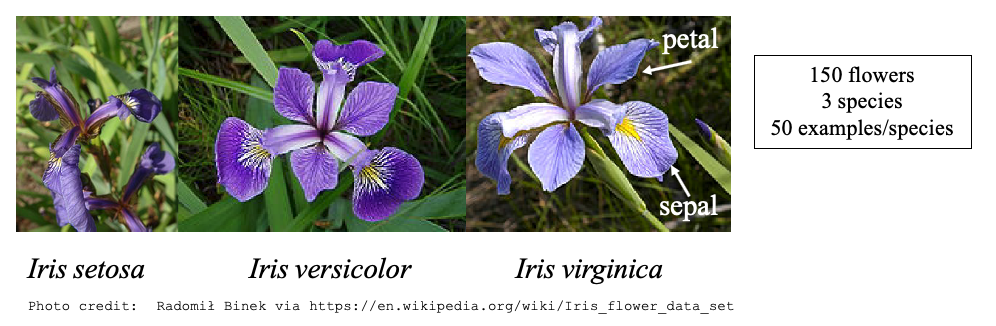

In [79]:
from IPython.display import Image

Image("images/iris.png")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE1B779AF0>,
      dtype=object)

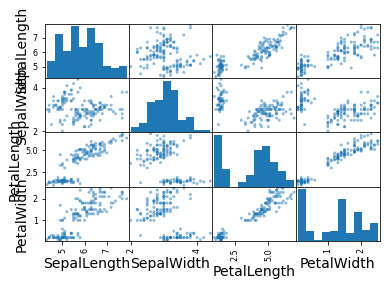

In [80]:
import matplotlib.pyplot as plt
import pandas as pd

# read data from CSV file to dataframe

iris = pd.read_csv('./data/iris.csv')

# scatter matrix plot

pd.plotting.scatter_matrix(iris)





# Decision Trees

- Read the details of decision tree classifier

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

- Check out the difference between model parameters and hyper parameters:

https://towardsdatascience.com/model-parameters-and-hyperparameters-in-machine-learning-what-is-the-difference-702d30970f6


### Load data

- For the following code, we use sklearn.datasets package for loading a dataset instead of reading a data file stored on a local machine. 

In [81]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
print(iris)




{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

### Split the data to training and testing 

In [94]:
X = iris.data[:, 2:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)


## Training
### Learing using training data

- use Gini index measure 

*** Notes: you can also use gain information (entropy) measure by setting criterion="entropy" in the model

In [95]:
tree_clf = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)

tree_clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=4, random_state=42)

## Testing
### Evaluating the model using testing data

In [96]:
y_pred = tree_clf.predict(X_test)


# Visualization

## Confusion matrix

[[ 8  0  0]
 [ 0 19  3]
 [ 0  2 13]]


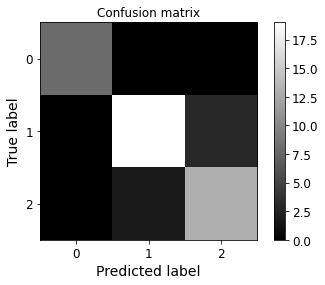

In [97]:
# plot a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)


### Model performance summary

In [98]:
# Print classification report

target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names = target_names)

print(result_metrics)


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.90      0.86      0.88        22
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.89      0.89      0.89        45



In [99]:
# you can access each class's metrics from result_metrics

result_metrics_dict = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

print(result_metrics_dict['setosa']['precision'])

1.0


### Draw a decision tree

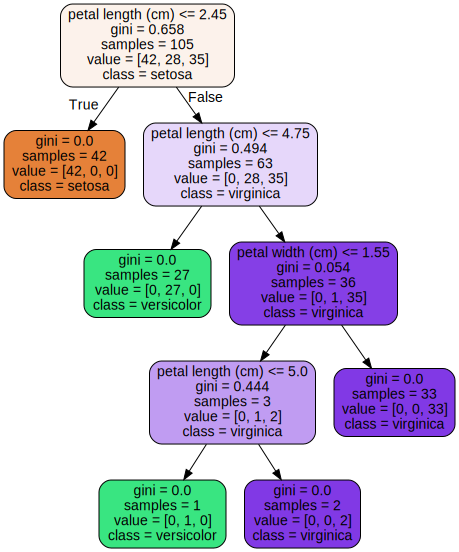

In [101]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

## k-Cross Validation

- using KFold function with freedom

In [102]:
from sklearn.model_selection import KFold # import k-fold validation

kf = KFold(n_splits=3, random_state=None, shuffle=True) # Define the split - into 2 folds 

kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

print(kf) 


KFold(n_splits=3, random_state=None, shuffle=True)


### Applying k-Cross Validation

In [103]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.93      0.88      0.90        16
   virginica       0.90      0.95      0.93        20

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       0.86      0.95      0.90        19
   virginica       0.92      0.79      0.85        14

    accuracy                           0.92        50
   macro avg       0.92      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.75      0.83        16

    accuracy        

# Predicting classes and class probabilities

In [105]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.   , 0.875, 0.125]])

In [106]:
tree_clf.predict([[5, 1.5]])


array([1])

# Decision Tree boundary Visualization

In [ ]:
## Example1

Saving figure decision_tree_decision_boundaries_plot


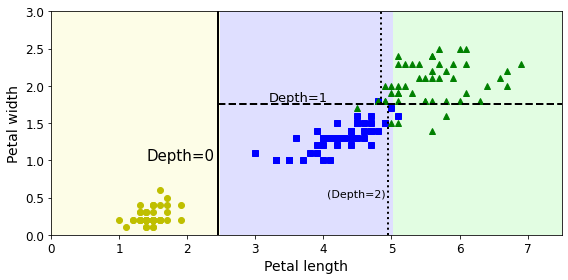

In [107]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()

# Sensitivity to training set details

In [108]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # widest Iris versicolor flower

array([[4.8, 1.8]])

In [109]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

Saving figure decision_tree_instability_plot


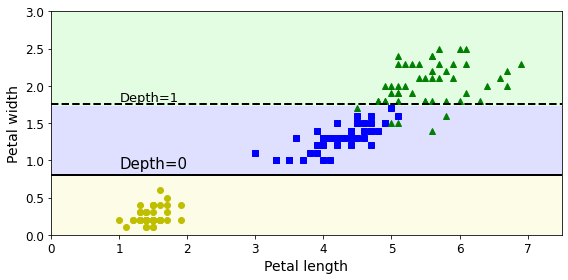

In [110]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

save_fig("decision_tree_instability_plot")
plt.show()

Saving figure min_samples_leaf_plot


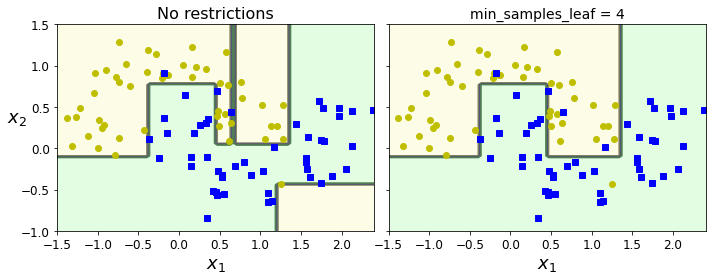

In [111]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("")

save_fig("min_samples_leaf_plot")
plt.show()

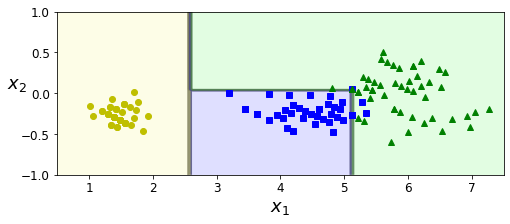

In [112]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

Saving figure sensitivity_to_rotation_plot


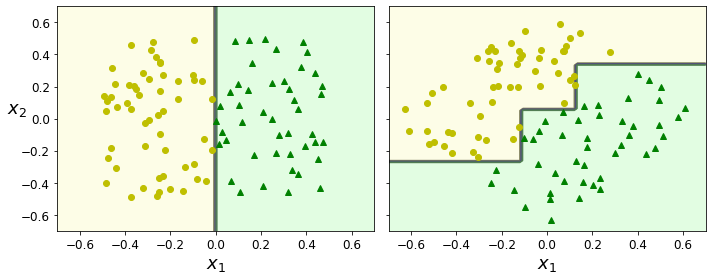

In [113]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

save_fig("sensitivity_to_rotation_plot")
plt.show()

# TW4

## Part 1

## Construct decision trees

#### 1. Construct  a decision tree using the following parameters

- Use information gain (entropy) measure
- Apply k=10 cross validation and print a summary of statistics (performance evaluation) for each fold


#### 2. Compare the performance results with those of the decision tree using Gini index measure in the above example

#### 3. For both trees, change the following parameters and observe the changes:

- The depth of tree: currently max_depth=2 in the model training step. Change the depth 3, 4, 5 and check if this affects the overall results. 

- The k value for cross validation is currently set to 3. Change k value, k = 5, 7, 10 and check if this affects the overall results. 

In [68]:
tree_clf = DecisionTreeClassifier(max_depth=4, criterion='entropy', random_state=42)

tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [69]:
y_pred = tree_clf.predict(X_test)


[[ 8  0  0]
 [ 0 18  4]
 [ 0  1 14]]


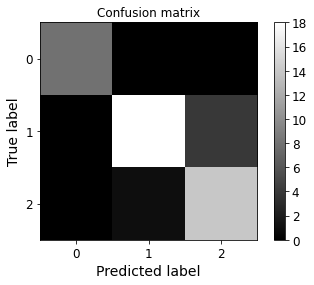

In [70]:
# plot a confusion matrix

confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

plot_confusion_matrix(confusion_mat, 3)

In [71]:
# Print classification report

target_names = iris.target_names

result_metrics = classification_report(y_test, y_pred, target_names = target_names)

print(result_metrics)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.95      0.82      0.88        22
   virginica       0.78      0.93      0.85        15

    accuracy                           0.89        45
   macro avg       0.91      0.92      0.91        45
weighted avg       0.90      0.89      0.89        45



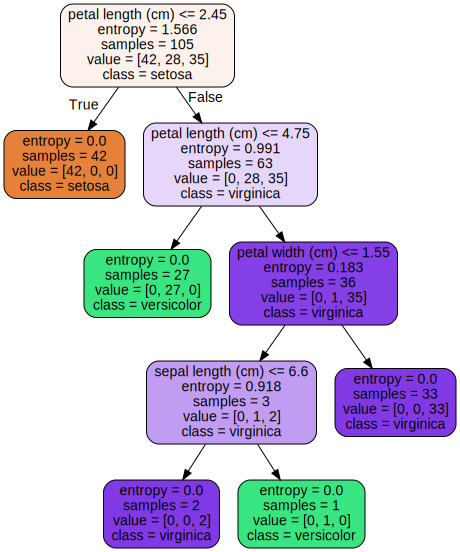

In [72]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [115]:
from sklearn.model_selection import KFold # import k-fold validation

kf5 = KFold(n_splits=5, random_state=None, shuffle=True) # Define the split - into 4 folds 

kf5.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

kf7 = KFold(n_splits=7, random_state=None, shuffle=True) # Define the split - into 6 folds 

kf7.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

kf10 = KFold(n_splits=10, random_state=None, shuffle=True) # Define the split - into 9 folds 

kf10.get_n_splits(X) # returns the number of splitting iterations in the cross-validator

10

In [117]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

for train_index, test_index in kf10.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    tree_clf.fit(X_train, y_train)
    
    y_pred = tree_clf.predict(X_test)
    
    # Print classification report
    target_names = iris.target_names
    print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       1.00      1.00      1.00         8
   virginica       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         4
  versicolor       0.80      0.80      0.80         5
   virginica       0.83      0.83      0.83         6

    accuracy                           0.87        15
   macro avg       0.88      0.88      0.88        15
weighted avg       0.87      0.87      0.87        15

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         3
  versicolor       1.00      0.86      0.92         7
   virginica       0.83      1.00      0.91         5

    accuracy        

## Part 2

#### 1. Look through an example list at:
    
https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

#### 2. Discuss about different ways to handle the following types of data for decision tree classification. 

- text data (strings): in the case a dataset includes non-numerical data. 

- continuous data like age, weight, income, etc.
 

*** Notes: This will be also a reference for our next problem-solving assignment.

Often times text data is categorical itself, in which case it can be converted to numeric identifiers. Continuous data on the other hand can be converted into categories of a certain range. These methods can help clean the data to be of better use in a classification model. 

### Submission(s): Each individual student should make own submission. 

#### - Write a short paragraph describing what you found from the process on Canvas.
#### - Upload the notebook on your Git repo and write an URL link. 

The big thing I learned was how easy it is to overfit a Decision Tree. It is important to limit the number of depth of the tree in order to prevent this. In the case of classifying the petals in this assignment, it only took 4 steps to reach maximum purity. I also learned that it is important to limit the minimum samples in a leaf to prevent the model from being overly sensitive to outliers. 